In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carga de dataset archivo base de datos cliente
dataset_titanic = pd.read_csv("C:/Users/hevas/Downloads/data_titanic_proyecto.csv", sep=',')
dataset_titanic.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [11]:
dataset_titanic.shape

(891, 13)

In [20]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Name                   891 non-null    object 
 2   Age                    714 non-null    float64
 3   SibSp                  891 non-null    int64  
 4   Parch                  891 non-null    int64  
 5   Ticket                 891 non-null    object 
 6   Fare                   891 non-null    float64
 7   Cabin                  204 non-null    object 
 8   Embarked               889 non-null    object 
 9   passenger_class        891 non-null    object 
 10  passenger_sex          891 non-null    object 
 11  passenger_survived     891 non-null    object 
 12  no_passenger_survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


In [3]:
dataset_titanic.isna().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [21]:
dataset_titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare,no_passenger_survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [3]:
dataset_titanic.describe(include=['O'])

,Name,Ticket,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
count,891,891,204,889,891,891,891
unique,891,681,147,3,3,2,2
top,"Braund, Mr. Owen Harris",347082,B96 B98,S,Lower,M,N
freq,1,7,4,644,491,577,549


In [4]:
dataset_titanic['passenger_survived'].unique()

array(['N', 'Y'], dtype=object)

In [5]:
dataset_titanic['no_passenger_survived'] = dataset_titanic['passenger_survived'].map( {'Y': 1, 'N': 0})

In [6]:
dataset_titanic.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N,0


In [13]:
dataset_titanic['no_passenger_survived'].unique()

array([0, 1], dtype=int64)

In [18]:
dataset_titanic.groupby('passenger_survived').size()

passenger_survived
N    549
Y    342
dtype: int64

N: No sobrevive: 549
S: Sobrevive: 342
Proporción: 1.61 : 1


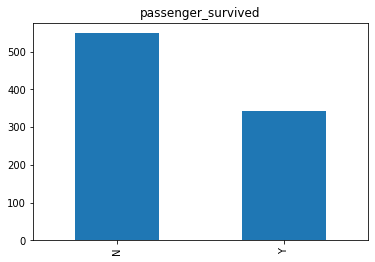

In [39]:
#sns.factorplot('passenger_survived', data=dataset_titanic,kind="count")

# Detección del desbalance de la muestras
target_count = dataset_titanic.passenger_survived.value_counts()
print('N: No sobrevive:', target_count[0])
print('S: Sobrevive:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='passenger_survived');

no_passenger_survived               
                              count  sum      mean
passenger_sex                                     
F                               314  233  0.742038
M                               577  109  0.188908

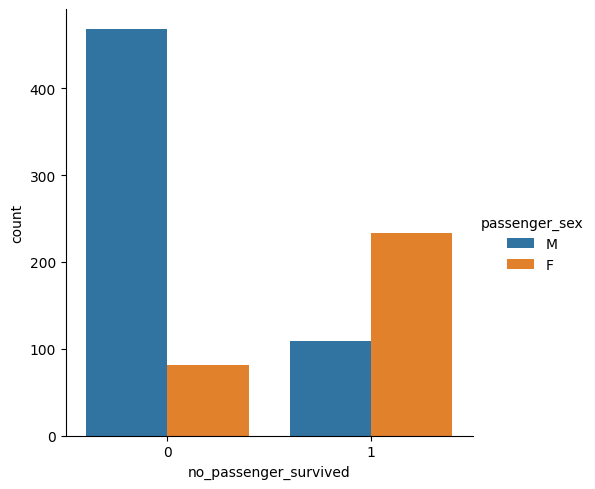

In [24]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='passenger_sex',kind="count")

dataset_titanic[['passenger_sex','no_passenger_survived']].groupby(['passenger_sex'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


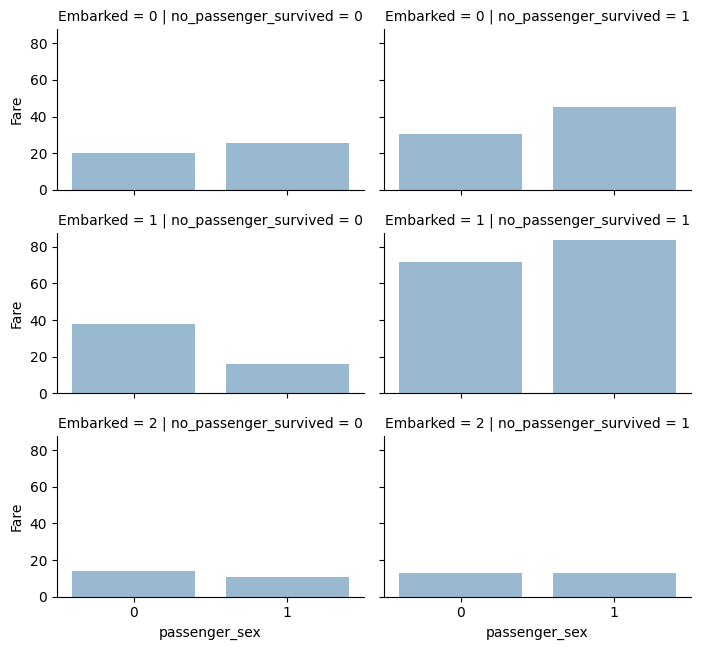

In [46]:
grid = sns.FacetGrid(dataset_titanic, row='Embarked', col='no_passenger_survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'passenger_sex','Fare', alpha = .5, ci=None)
grid.add_legend()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

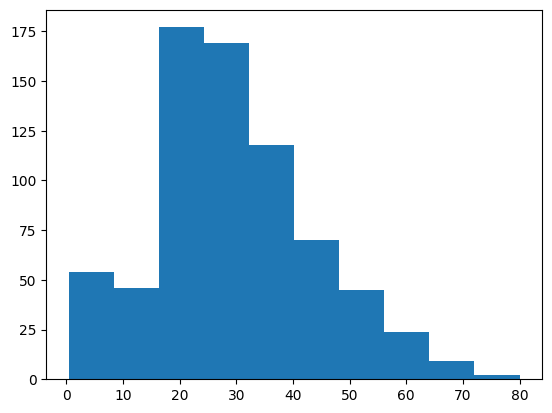

In [32]:
plt.hist(dataset_titanic.Age)

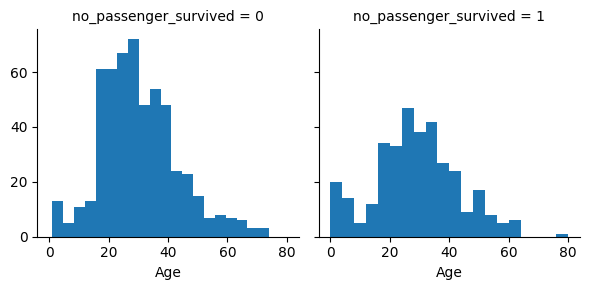

In [41]:
chart_edad_surv = sns.FacetGrid(dataset_titanic, col='no_passenger_survived')
chart_edad_surv.map(plt.hist, 'Age', bins = 20)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                                count  sum      mean
passenger_class                                     
Lower                             491  119  0.242363
Middle                            184   87  0.472826
Upper                             216  136  0.629630

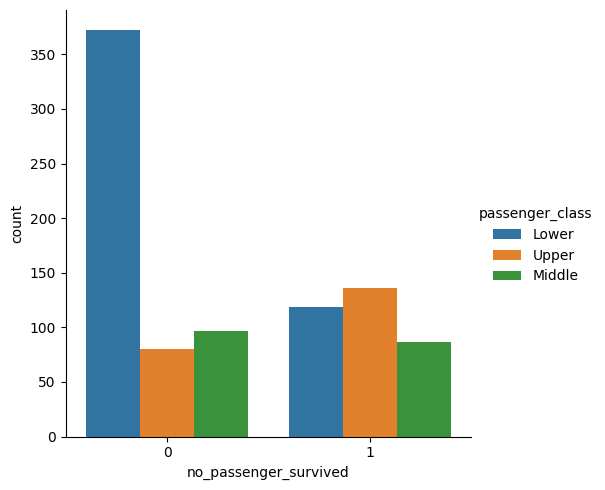

In [33]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='passenger_class',kind="count")

dataset_titanic[['passenger_class','no_passenger_survived']].groupby(['passenger_class'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                         count  sum      mean
Embarked                                     
C                          168   93  0.553571
Q                           77   30  0.389610
S                          644  217  0.336957

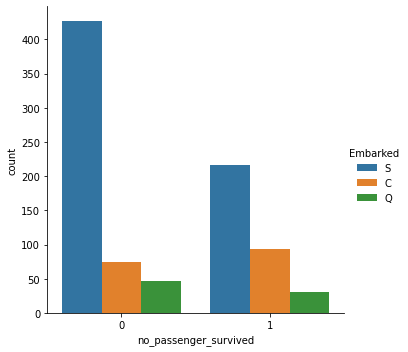

In [11]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='Embarked',kind="count")

dataset_titanic[['Embarked','no_passenger_survived']].groupby(['Embarked'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                      count  sum      mean
Parch                                     
0                       678  233  0.343658
1                       118   65  0.550847
2                        80   40  0.500000
3                         5    3  0.600000
4                         4    0  0.000000
5                         5    1  0.200000
6                         1    0  0.000000

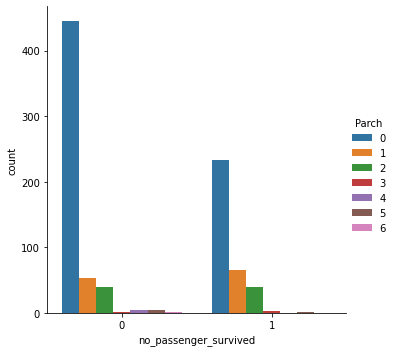

In [49]:
# of siblings / spouses aboard the titanic
# De hermanas / cónyuges a bordo del titanic
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='Parch',kind="count")

dataset_titanic[['Parch','no_passenger_survived']].groupby(['Parch'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                      count  sum      mean
SibSp                                     
0                       608  210  0.345395
1                       209  112  0.535885
2                        28   13  0.464286
3                        16    4  0.250000
4                        18    3  0.166667
5                         5    0  0.000000
8                         7    0  0.000000

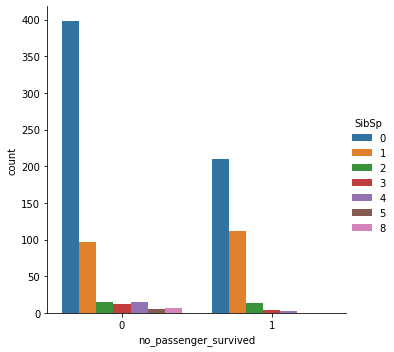

In [50]:
# of parents/ children aboard the titanic
# de padres/ hijos a bordo del titanic
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='SibSp',kind="count")

dataset_titanic[['SibSp','no_passenger_survived']].groupby(['SibSp'], as_index=False).agg(['count','sum','mean'])

<AxesSubplot:xlabel='passenger_class', ylabel='Fare'>

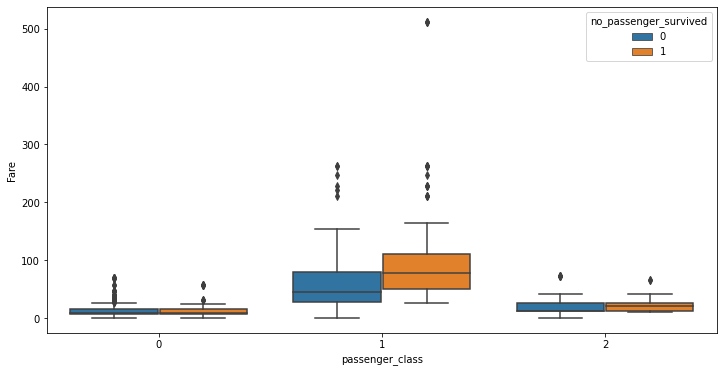

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(x="passenger_class",y="Fare", hue="no_passenger_survived", data=dataset_titanic)

In [7]:
dataset_titanic.drop(['Name','PassengerId','Cabin','Ticket'], axis='columns', inplace=True)

In [21]:
pd.get_dummies(dataset_titanic)

,PassengerId,Age,SibSp,Parch,Fare,no_passenger_survived,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Embarked_C,Embarked_Q,Embarked_S,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,passenger_sex_F,passenger_sex_M,passenger_survived_N,passenger_survived_Y
0,1,22.0,1,0,7.2500,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
1,2,38.0,1,0,71.2833,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,5,35.0,0,0,8.0500,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
887,888,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
888,889,NaN,1,2,23.4500,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
889,890,26.0,0,0,30.0000,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [60]:
dataset_titanic.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived
0,22,1,0,7.2500,0,0,0,N,0
1,38,1,0,71.2833,1,1,1,Y,1
2,26,0,0,7.9250,0,0,1,Y,1
3,35,1,0,53.1000,0,1,1,Y,1
4,35,0,0,8.0500,0,0,0,N,0


In [54]:
dataset_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
dataset_titanic['Embarked'].isna().sum()

2

In [8]:
# Imputamos la variable Embarked con la moda
dataset_titanic['Embarked'].fillna(dataset_titanic['Embarked'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " + 
      str(dataset_titanic['Embarked'].isnull().sum()))

Valores perdidos en num-of-doors: 0


In [54]:
dataset_titanic['Embarked'].isna().sum()

0

In [60]:
dataset_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})

In [62]:
dataset_titanic['passenger_class'].unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

In [10]:
dataset_titanic['passenger_class'] = dataset_titanic['passenger_class'].map( {'Lower': 0, 'Upper': 1, 'Middle': 2})

In [64]:
dataset_titanic['passenger_sex'].unique()

array(['M', 'F'], dtype=object)

In [11]:
dataset_titanic['passenger_sex'] = dataset_titanic['passenger_sex'].map( {'M': 0, 'F': 1})

In [12]:
dataset_titanic['Age'].isna().sum()

177

In [13]:
age_avg = dataset_titanic['Age'].mean()
age_std = dataset_titanic['Age'].std()
age_null_count = dataset_titanic['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(dataset_titanic['Age'])

dataset_titanic.loc[np.isnan(dataset_titanic['Age']), 'Age'] = age_null_random_list
dataset_titanic['Age'] = dataset_titanic['Age'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 29.69911764705882
Desvió Std Edad: 14.526497332334042
Intervalo para asignar edad aleatoria: 15 a 44


In [14]:
dataset_titanic['Age'].isna().sum()

0

In [55]:
# Mapping edad en la que llegaron al billboard
dataset_titanic.loc[ dataset_titanic['Age'] <= 16, 'edadEncoded']  = 0
dataset_titanic.loc[(dataset_titanic['Age'] > 16) & (dataset_titanic['Age'] <= 32), 'edadEncoded'] = 1
dataset_titanic.loc[(dataset_titanic['Age'] > 32) & (dataset_titanic['Age'] <= 48), 'edadEncoded'] = 2
dataset_titanic.loc[(dataset_titanic['Age'] > 48) & (dataset_titanic['Age'] <= 64), 'edadEncoded'] = 3
dataset_titanic.loc[ dataset_titanic['Age'] > 64, 'edadEncoded'] = 4

In [56]:
dataset_titanic['edadEncoded'] = dataset_titanic['edadEncoded'].astype(int)

In [57]:
dataset_titanic['edadEncoded']

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    2
889    1
890    1
Name: edadEncoded, Length: 891, dtype: int32

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                            count  sum      mean
edadEncoded                                     
0                             111   57  0.513514
1                             440  161  0.365909
2                             260   93  0.357692
3                              69   30  0.434783
4                              11    1  0.090909

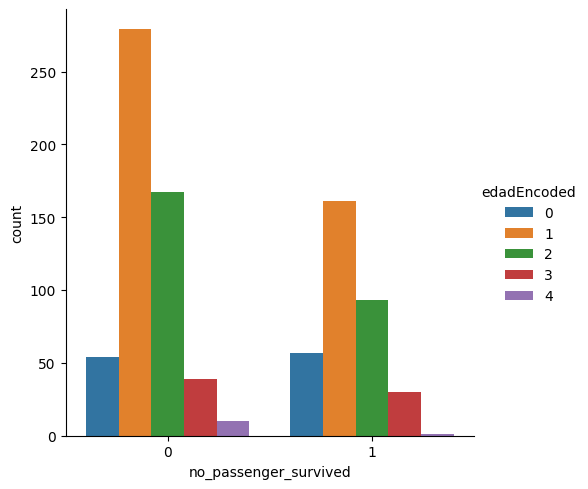

In [58]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='edadEncoded',kind="count")

dataset_titanic[['edadEncoded','no_passenger_survived']].groupby(['edadEncoded'], as_index=False).agg(['count','sum','mean'])

In [18]:
dataset_titanic.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived,edadEncoded
0,22,1,0,7.2500,0,0,0,N,0,4.0
1,38,1,0,71.2833,1,1,1,Y,1,7.0
2,26,0,0,7.9250,0,0,1,Y,1,5.0
3,35,1,0,53.1000,0,1,1,Y,1,6.0
4,35,0,0,8.0500,0,0,0,N,0,6.0


In [19]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    891 non-null    int32  
 1   SibSp                  891 non-null    int64  
 2   Parch                  891 non-null    int64  
 3   Fare                   891 non-null    float64
 4   Embarked               891 non-null    int64  
 5   passenger_class        891 non-null    int64  
 6   passenger_sex          891 non-null    int64  
 7   passenger_survived     891 non-null    object 
 8   no_passenger_survived  891 non-null    int64  
 9   edadEncoded            891 non-null    float64
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 66.3+ KB


In [59]:
correlaciones = dataset_titanic.corr()
correlaciones

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,no_passenger_survived,edadEncoded
Age,1.000000,-0.233345,-0.173304,0.074884,0.011970,0.173262,-0.092151,-0.069884,0.938245
SibSp,-0.233345,1.000000,0.414838,0.159651,-0.059961,-0.085918,0.114631,-0.035322,-0.212191
Parch,-0.173304,0.414838,1.000000,0.216225,-0.078665,-0.010198,0.245489,0.081629,-0.145856
Fare,0.074884,0.159651,0.216225,1.000000,0.062142,0.197168,0.182333,0.257307,0.088736
Embarked,0.011970,-0.059961,-0.078665,0.062142,1.000000,-0.168091,0.116569,0.106811,0.015438
passenger_class,0.173262,-0.085918,-0.010198,0.197168,-0.168091,1.000000,0.118133,0.247845,0.173952
passenger_sex,-0.092151,0.114631,0.245489,0.182333,0.116569,0.118133,1.000000,0.543351,-0.088694
no_passenger_survived,-0.069884,-0.035322,0.081629,0.257307,0.106811,0.247845,0.543351,1.000000,-0.065342
edadEncoded,0.938245,-0.212191,-0.145856,0.088736,0.015438,0.173952,-0.088694,-0.065342,1.000000


<AxesSubplot:>

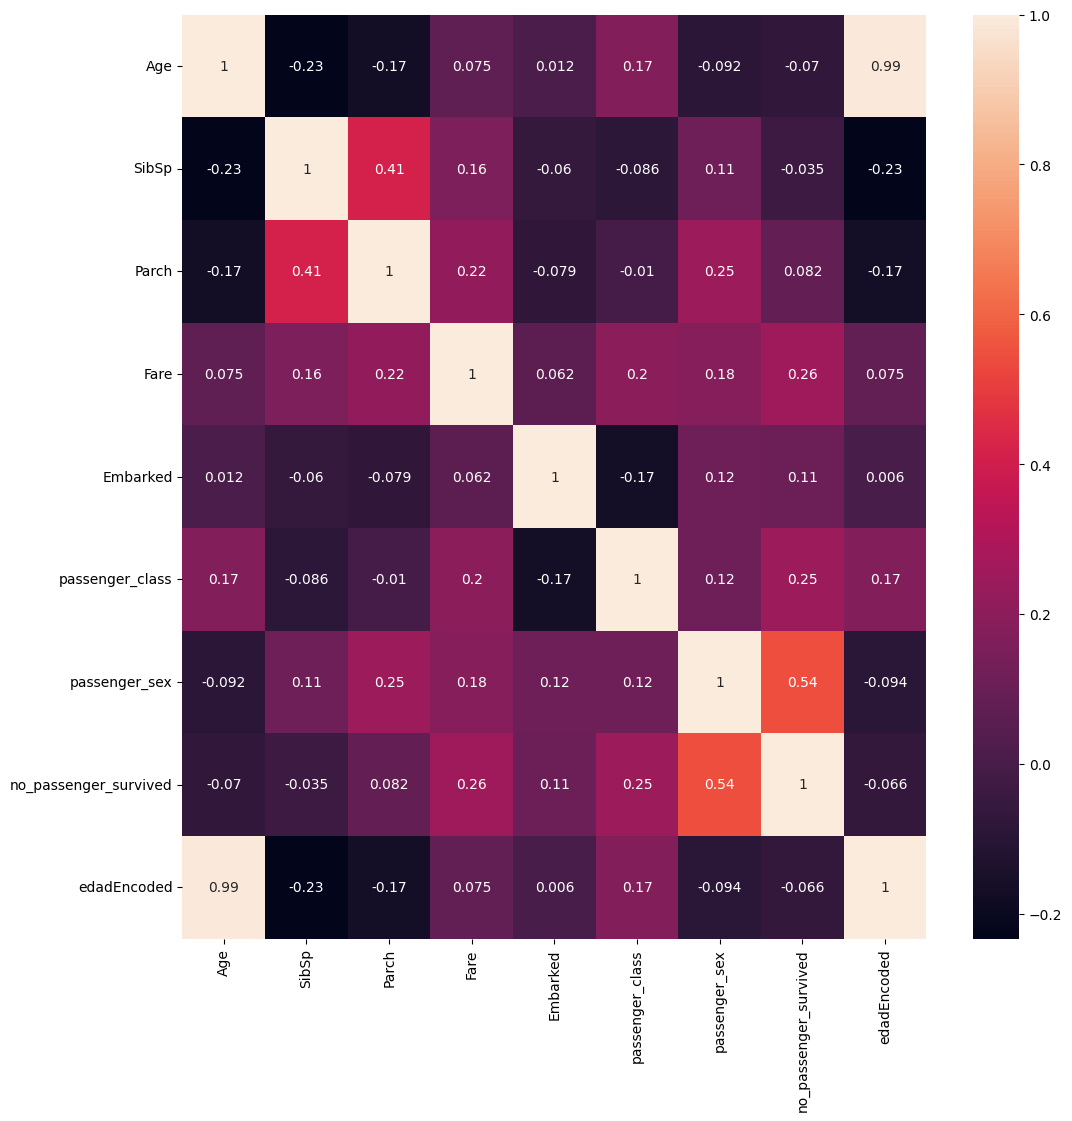

In [21]:
#mapa de correlacion
plt.figure(figsize=(12,12))
sns.heatmap(correlaciones,annot = True)

In [78]:
dataset_titanic.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'passenger_class',
       'passenger_sex', 'passenger_survived', 'no_passenger_survived',
       'edadEncoded'],
      dtype='object')

In [72]:
dataset_titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

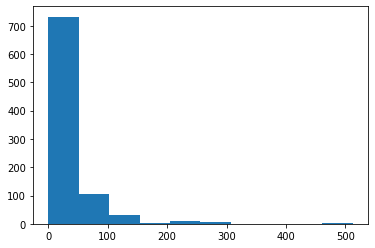

In [67]:
plt.hist(dataset_titanic.Fare)

In [22]:
from sklearn.feature_selection import SelectKBest

In [25]:
X = dataset_titanic[['edadEncoded','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex','Age']]
y = dataset_titanic['no_passenger_survived']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Fare', 'passenger_class', 'passenger_sex'], dtype='object')


In [27]:
# Seleccionaremos un 20% de los datos para estrudiar el beneficio de las estretgias de muestreo
import sklearn.model_selection as model_selection


#X = dataset_titanic[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X = dataset_titanic[['Fare', 'passenger_class', 'passenger_sex','edadEncoded']]
y = dataset_titanic[['no_passenger_survived']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=101)

In [28]:
# Solo utilizaremos Datos de entrenamiento para la estrategia 
df_train = pd.concat([X_train,y_train],axis=1)

In [29]:
df_train.head(3)

,Fare,passenger_class,passenger_sex,edadEncoded,no_passenger_survived
733,13.00,2,0,4.0,0
857,26.55,1,0,10.0,1
81,9.50,0,0,5.0,1


In [30]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.no_passenger_survived.value_counts()

# Divide by class
df_class_0 = df_train[df_train['no_passenger_survived'] == 0]
df_class_1 = df_train[df_train['no_passenger_survived'] == 1]

In [31]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(450, 450, 262, 262)

**UnderSampling**

In [32]:
df_class_0.sample(3)

,Fare,passenger_class,passenger_sex,edadEncoded,no_passenger_survived
64,27.7208,1,0,5.0,0
841,10.5000,2,0,3.0,0
872,5.0000,1,0,6.0,0


Estrategia de Muestreo under-sampling:
0    262
1    262
Name: no_passenger_survived, dtype: int64


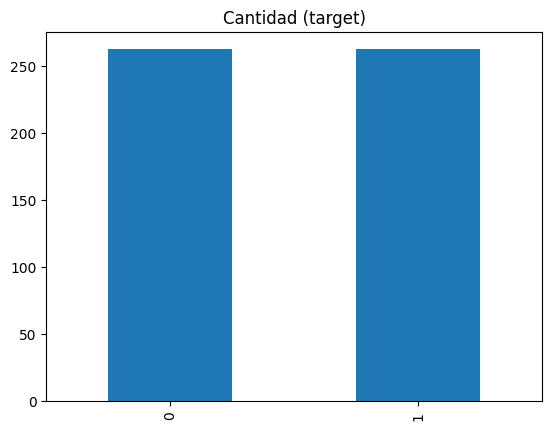

In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_test_under.no_passenger_survived.value_counts())

df_test_under.no_passenger_survived.value_counts().plot(kind='bar', title='Cantidad (target)');

OverSampling

In [34]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,Fare,passenger_class,passenger_sex,edadEncoded,no_passenger_survived
81,9.50,0,0,5.0,1
857,26.55,1,0,10.0,1
81,9.50,0,0,5.0,1
81,9.50,0,0,5.0,1


Random over-sampling:
0    450
1    450
Name: no_passenger_survived, dtype: int64


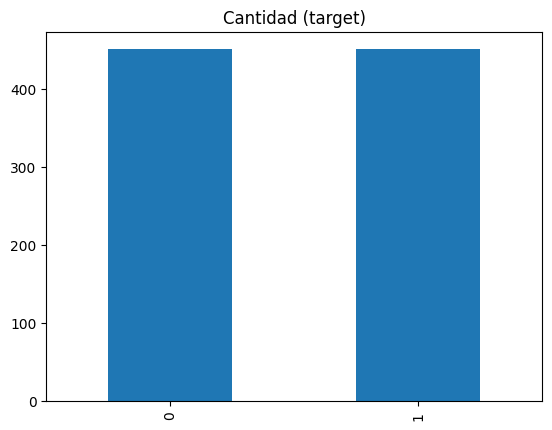

In [35]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.no_passenger_survived.value_counts())

df_test_over.no_passenger_survived.value_counts().plot(kind='bar', title='Cantidad (target)');

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 77.09%
Log Loss: 7.911178919303692


Matriz de Confusión - DATOS ORIGINALES:
 [[90  9]
 [26 54]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.68      0.76        80

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\1813899074.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\1813899074.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


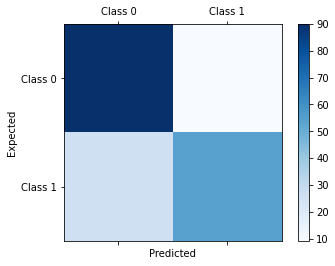

In [139]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

UNDER SAMPLING

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#X_train_u= df_test_under[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X_train_u= df_test_under[['Fare', 'passenger_class', 'passenger_sex']]
y_train_u = df_test_under[['no_passenger_survived']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 77.65%
Log Loss: 7.718265064454313


Matriz de Confusión UNDERSAMPLING:
 [[76 23]
 [17 63]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.73      0.79      0.76        80

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\772091198.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\772091198.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


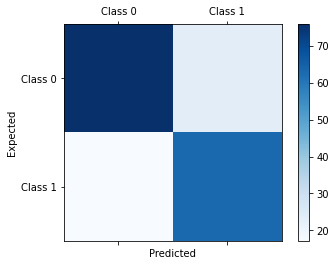

In [141]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

OVER SAMPLING

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#X_train_o= df_test_over[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X_train_o= df_test_over[['Fare', 'passenger_class', 'passenger_sex']]
y_train_o = df_test_over[['no_passenger_survived']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 78.77%
Log Loss: 7.332325679136811


Matriz de Confusión OVERSAMPLING:
 [[83 16]
 [22 58]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.78      0.72      0.75        80

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\1558204625.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_2668\1558204625.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


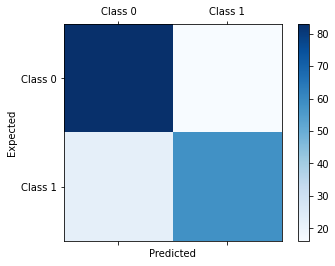

In [143]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()